# Imports

In [3]:
import pandas as pd
import sys
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\custom_python")
from silvhua import *
import seaborn as sns
import matplotlib.pyplot as plt

# load data

In [4]:
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\data'
df_fw = load_csv('data_freeweight.csv',path, column1_as_index=False)
print(df_fw.shape)
df_fw.head()

(52, 15)


,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV
0,22,77.8,175.0,39.0,78,114.0,156.0,175.0,190.0,1.05,0.91,0.76,0.52,0.39,0.26
1,21,71.6,179.0,24.0,48,72.0,96.0,108.0,120.0,1.03,0.91,0.68,0.49,0.39,0.27
2,19,60.8,165.0,26.0,52,78.0,104.0,117.0,130.0,1.06,0.92,0.76,0.51,0.37,0.26
3,21,58.4,172.0,20.0,40,60.0,80.0,90.0,100.0,0.97,0.85,0.68,0.50,0.38,0.26
4,20,82.3,185.0,30.0,60,90.0,120.0,135.0,150.0,1.02,0.92,0.76,0.50,0.40,0.29


In [5]:
df_fw.columns

Index(['Age', 'Mass', 'Height', 'Load20%1RM', 'Load40%1RM', 'Load60%1RM',
       'Load80%1RM', 'Load90%1RM', 'Load-1RM-1', '20% MV', '40%MV', '60%MV',
       '80%MV', '90%MV', '100%MV'],
      dtype='object')

In [6]:
velocity_columns = df_fw.columns[df_fw.columns.str.contains('MV')].to_list()
load_columns = df_fw.columns[df_fw.columns.str.contains('Load')].to_list()
velocity_columns+load_columns

['20% MV',
 '40%MV',
 '60%MV',
 '80%MV',
 '90%MV',
 '100%MV',
 'Load20%1RM',
 'Load40%1RM',
 'Load60%1RM',
 'Load80%1RM',
 'Load90%1RM',
 'Load-1RM-1']

# EDA

## Reshape data frame

### Experiment with commands

In [7]:
test = df_fw.loc[:1,velocity_columns+load_columns]
test

,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1
0,1.05,0.91,0.76,0.52,0.39,0.26,39.0,78,114.0,156.0,175.0,190.0
1,1.03,0.91,0.68,0.49,0.39,0.27,24.0,48,72.0,96.0,108.0,120.0


In [8]:
# test = test.melt(
#     id_vars='Load-1RM-1',
#     value_vars=velocity_columns, var_name='%1RM', value_name='velocity',
#     ignore_index=False
#     )
test = pd.concat([
    test.melt(
        id_vars='Load-1RM-1',
        value_vars=velocity_columns, var_name='%1RM', value_name='velocity',
        ignore_index=False
    ),
    test.melt(
        # id_vars='Load-1RM-1',
        value_vars=load_columns, var_name='%1RM', value_name='absolute load',
        ignore_index=False
    )
], axis=1)
test

,Load-1RM-1,%1RM,velocity,%1RM,absolute load
0,190.0,20% MV,1.05,Load20%1RM,39.0
1,120.0,20% MV,1.03,Load20%1RM,24.0
0,190.0,40%MV,0.91,Load40%1RM,78.0
1,120.0,40%MV,0.91,Load40%1RM,48.0
0,190.0,60%MV,0.76,Load60%1RM,114.0
1,120.0,60%MV,0.68,Load60%1RM,72.0
0,190.0,80%MV,0.52,Load80%1RM,156.0
1,120.0,80%MV,0.49,Load80%1RM,96.0
0,190.0,90%MV,0.39,Load90%1RM,175.0
1,120.0,90%MV,0.39,Load90%1RM,108.0


In [9]:
df_fw.head(4).sort_values('Load-1RM-1').reset_index(drop=True)

,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV
0,21,58.4,172.0,20.0,40,60.0,80.0,90.0,100.0,0.97,0.85,0.68,0.50,0.38,0.26
1,21,71.6,179.0,24.0,48,72.0,96.0,108.0,120.0,1.03,0.91,0.68,0.49,0.39,0.27
2,19,60.8,165.0,26.0,52,78.0,104.0,117.0,130.0,1.06,0.92,0.76,0.51,0.37,0.26
3,22,77.8,175.0,39.0,78,114.0,156.0,175.0,190.0,1.05,0.91,0.76,0.52,0.39,0.26


### Create function

In [10]:
# Create function
def reshape_group_df(df):
    
    # Sort participants by strength
    df = df.sort_values('Load-1RM-1').reset_index(drop=True)
    
    velocity_columns = df_fw.columns[df_fw.columns.str.contains('MV')]
    df = pd.concat([
        df.melt(
            value_vars=load_columns, value_name='absolute load',
            ignore_index=False
        ),
        df.melt(
            id_vars='Load-1RM-1',
            value_vars=velocity_columns, var_name='%1RM', value_name='mean velocity',
            ignore_index=False
            )
    ], axis=1).drop(columns='variable')
    df['%1RM'] = df['%1RM'].str.replace('(\d*)\D*','\\1', regex=True).astype(float)
    df = df.rename({'Load-1RM-1':'1RM'}, axis=1)

    df = df.reset_index(names='participant')
    return df

# Test the function on first participant's data
print(df_fw.head(1).filter(regex='Load|MV'))
reshape_group_df(df_fw.head(1))

   Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  Load90%1RM  Load-1RM-1  \
0        39.0          78       114.0       156.0       175.0       190.0   

   20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  
0    1.05   0.91   0.76   0.52   0.39    0.26  


,participant,absolute load,1RM,%1RM,mean velocity
0,0,39.0,190.0,20.0,1.05
1,0,78.0,190.0,40.0,0.91
2,0,114.0,190.0,60.0,0.76
3,0,156.0,190.0,80.0,0.52
4,0,175.0,190.0,90.0,0.39
5,0,190.0,190.0,100.0,0.26


## Plot the data

<AxesSubplot: xlabel='absolute load', ylabel='mean velocity'>

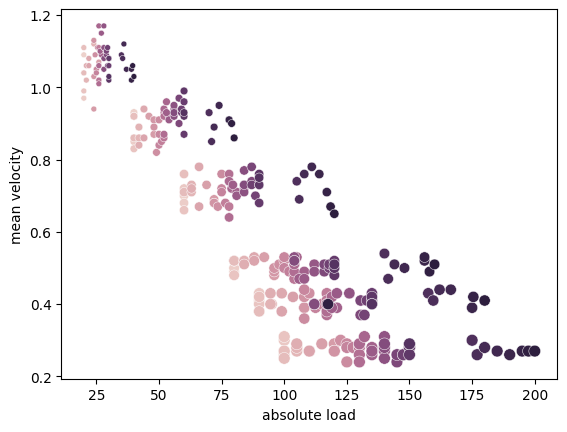

In [11]:
# Size of marker represents %1RM
sns.scatterplot(data=reshape_group_df(df_fw), x='absolute load', y='mean velocity',
    hue='participant',
    legend=False, size='%1RM'
)

<AxesSubplot: xlabel='%1RM', ylabel='mean velocity'>

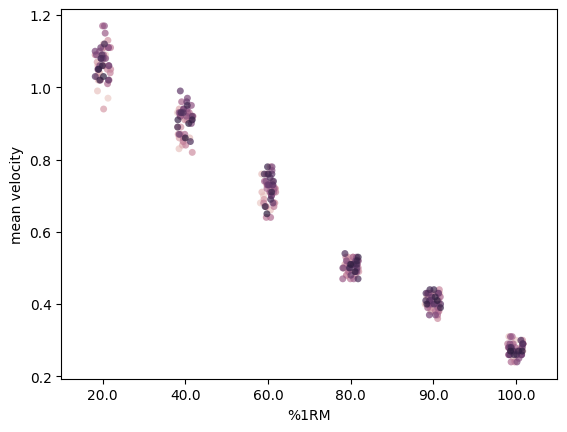

In [12]:
sns.stripplot(data=reshape_group_df(df_fw), x='%1RM', y='mean velocity',
    alpha=0.7,
    hue='participant',legend=False
)

<AxesSubplot: xlabel='%1RM', ylabel='mean velocity'>

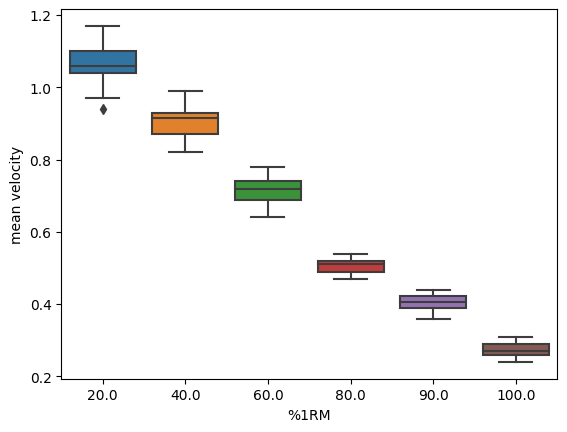

In [13]:
sns.boxplot(data=reshape_group_df(df_fw), x='%1RM', y='mean velocity')

<AxesSubplot: xlabel='%1RM', ylabel='absolute load'>

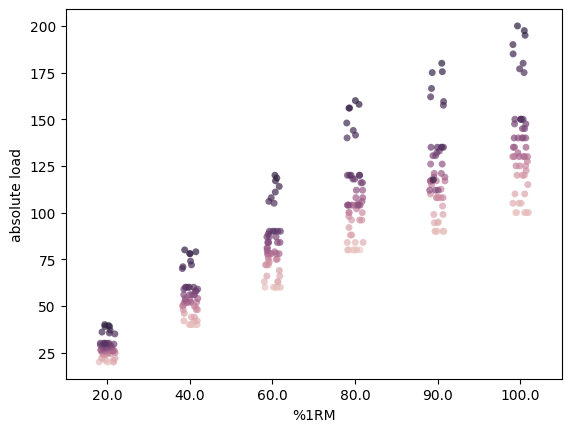

In [14]:
sns.stripplot(data=reshape_group_df(df_fw), x='%1RM', y='absolute load',
    alpha=0.7,
    hue='participant',legend=False
)

<AxesSubplot: xlabel='%1RM', ylabel='absolute load'>

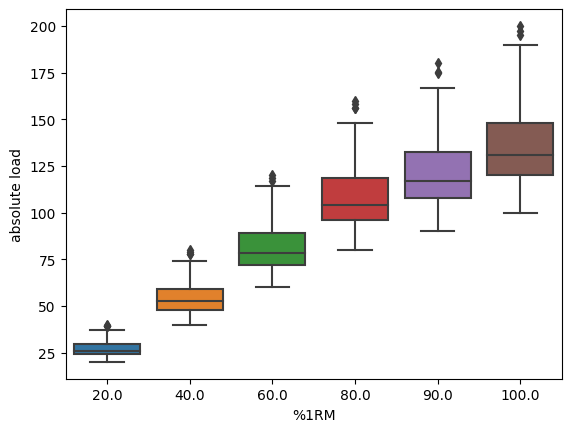

In [15]:
sns.boxplot(data=reshape_group_df(df_fw), x='%1RM', y='absolute load')

In [20]:
participant0 = df_fw.head(1)
participant0

,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV
0,22,77.8,175.0,39.0,78,114.0,156.0,175.0,190.0,1.05,0.91,0.76,0.52,0.39,0.26


<AxesSubplot: xlabel='%1RM', ylabel='mean velocity'>

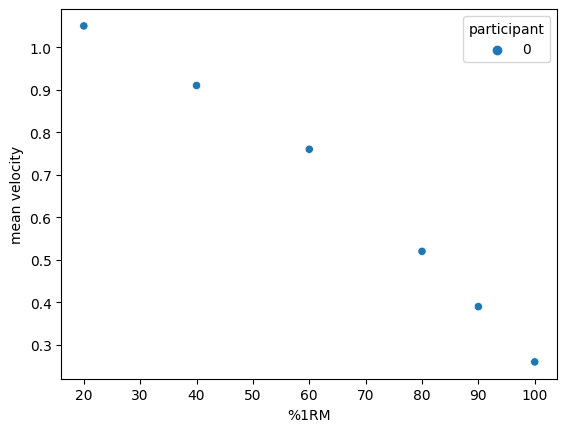

In [160]:
# This represents models 1 and 2
sns.scatterplot(data=reshape_group_df(participant0), x='%1RM', y='mean velocity',
hue='participant')

# *End of Page*